# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Fakhrizal Ahadiat
- Email: fakhrizal.a.ahadiat@gmail.com
- Id Dicoding:fakhrizal_ahadiat

## Background

**Bike sharing systems** are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

### Dataset

**Bike-sharing** rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

Terdapat 2 dataset yaitu dataset **day.csv** dan **hour.csv**

**General Information Dataset**

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Defining the Business Question

- How does Bike Sharing Rent compare between casual and registered types?
- What is the trend of Bike Sharing Rent per year?
- What are the Bike Sharing Rent trends by day, month and year?
- During what time of day do most Bike Rent events occur?
- How is Bike Sharing Rent seasonally, what are the highest and lowest seasons for bike rentals?
- What are the factors that influence the number of Bike Sharing Rent?

## Prepare all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

#### Load Data day.csv

In [2]:
bike_days= pd.read_csv('data/day.csv')
bike_days.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [3]:
print("Number of Data and columns", bike_days.shape)

Number of Data and columns (731, 16)


#### Load Data hour.csv

In [4]:
bike_hours= pd.read_csv('data/hour.csv')
bike_hours.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [5]:
print("Number of Data and columns", bike_hours.shape)

Number of Data and columns (17379, 17)


**Observation**

After seeing that the data in day.csv and hour.csv are almost the same overall, the only difference is the hr column which is not in the day.csv

### Assessing Data

For assessing the dataset, there are several things that must be checked, such as:

#### Day data

**Type Dataset**

In [6]:
bike_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
bike_days.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

**Observation**

- There are some columns that are difficult to read such as `dteday, yr, mnth, cnt` therefore there are some that will be renamed, namely 
    - `dteday` becomes `date_day`
    - `yr` becomes `year`, 
    - `mnth` becomes `month`
    - `cnt` becomes `total_rent`
- The data type `dteday` is an object type and should be datetime type because the column is a bike rent date.
- There is data in `season` and `weathersit` of integer type so later during analysis, the data will be changed to object type according to the parameters in general information to facilitate analysis
- There is data on `yr, mnth` in integer type then later during analysis, the data will be converted to `datetime` names to get better insight. 
    Example: in column `yr` : 0 becomes 2011, in column `mnth`: 1 becomes January
- There is data on weekday of integer type then later during analysis, the data will be converted to `datetime` names type to get better insight.
    Example: 0 becomes Sunday

**Missing Value Checking**

In [8]:
bike_days.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

After checking the missing value in the day.csv data there is no missing data

**Duplicate Checking**

In [9]:
print("Number of Duplicate Data :",bike_days.duplicated().sum())

Number of Duplicate Data : 0


There is no duplicate data in day.csv

**Summary Statistic Checking**

In [10]:
bike_days.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


**Observation**

After checking so far there is no anomalous data, based on general information that `temp`, `atemp`, `hum`, `windspeed` values are the result of normalization so to facilitate and get better insight, during analysis, the data will be changed to the value before normalization.

#### Hour Data

**Type Dataset**

In [11]:
bike_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
bike_hours.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

**Observation**

Overall assessing on hour.csv data is the same treatment as day.csv data with only a few additions to the `hr` data which will change the column name `hr` to `hour`.

**Missing Value Checking**

In [13]:
bike_hours.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

After checking the missing value in the hour.csv data there is no missing value

**Duplicate Checking**

In [14]:
print("Number of Duplicate Data :",bike_hours.duplicated().sum())

Number of Duplicate Data : 0


There is no duplicate data in hour.csv

**Summary Statistic**

In [15]:
bike_hours.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


**Observation**

To assess the data in `temp,atemp,hum,windspeed` hour.csv is the same as done in day.csv 

### Cleaning Data

#### Day Data

In [16]:
bike_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Rename Column**

In [17]:
bike_days.rename(columns={'dteday':'date_day',
                         'yr':'year',
                         'mnth':'month',
                         'cnt':'total_rent'}, inplace=True)

**Convert date_day menjadi Tipe data Datetime**

In [18]:
bike_days['date_day'] = pd.to_datetime(bike_days['date_day'])

**Drop unused column**

In [19]:
bike_days.drop('instant', axis=1, inplace=True)

In [20]:
bike_days.head(3)

,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rent
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


**Save Data**

In [21]:
bike_days.to_csv('data/bike_day_clean.csv', index=False)

#### Hour Data

In [22]:
bike_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Rename Column**

In [23]:
bike_hours.rename(columns={'dteday':'date_day',
                         'yr':'year',
                         'mnth':'month',
                         'hr':'hour',
                         'cnt':'total_rent'}, inplace=True)

**Convert date_day menjadi Tipe data Datetime**

In [24]:
bike_hours['date_day'] = pd.to_datetime(bike_hours['date_day'])

**Drop unused column**

In [25]:
bike_hours.drop('instant', axis=1, inplace=True)

In [26]:
bike_hours.head(3)

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rent
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


**Save Data**

In [27]:
bike_hours.to_csv('data/bike_hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Check Statistical Summary

**Day Statistic Summary**

In [28]:
bike_days.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
year,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
month,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500


**Observation**

- `temp` has values from 0.059 to 0.86 and an average of 0.49.
- `atemp` has values from 0.079 to 0.84 and the average is 0.47
- `hum` has values from 0 to 0.97 and the average is 0.62
- `windspeed` has values from 0.022 to 0.50 and an average of 0.19

**Hour Statistic Summary**

In [29]:
bike_hours.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


**Observation**

- `temp` has values from 0.02 to 1 and an average of 0.49.
- `atemp` has a value from 0 to 1 and an average of 0.47
- `hum` has values from 0 to 1 and averages 0.62
- `windspeed` has values from 0 to 1 and averages 0.19

### Bike Rent By User Type

In [30]:
bike_days.head(3)

,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rent
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [31]:
bikeday_usertype = bike_days[['casual','registered']].sum().reset_index()
bikeday_usertype.rename(columns={'index':'User type',0:'count'}, inplace=True)
bikeday_usertype

,User type,count
0,casual,620017
1,registered,2672662


**Observation**

Based on statistics, the number of registered bicycle borrowers is 4x more than the casual type.

### Bike Rent by Year

In [32]:
bike_year = bike_days[['year','casual','registered','total_rent']]
bike_year['year'] = bike_year['year'].map({0:2011, 1:2012})

bike_year = bike_year.groupby('year').agg({'casual':'sum',
                                  'registered':'sum',
                                  'total_rent':'sum'}).reset_index()
bike_year

,year,casual,registered,total_rent
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


**Observation**

Bike sharing rent highest in 2022

### Bike Rent by Month

In [33]:
bike_month = bike_days[['date_day','casual','registered','total_rent']]
bike_month['month'] = pd.to_datetime(bike_month['date_day']).dt.month_name()

bike_month = bike_month.groupby('month').agg({'casual':'sum',
                                  'registered':'sum',
                                  'total_rent':'sum'}).reset_index()
bike_month.sort_values('total_rent', ascending = False)

,month,casual,registered,total_rent
1,August,72039,279155,351194
6,June,73906,272436,346342
11,September,70323,275668,345991
5,July,78157,266791,344948
8,May,75285,256401,331686
10,October,59760,262592,322352
0,April,60802,208292,269094
9,November,36603,218228,254831
7,March,44444,184476,228920
2,December,21693,189343,211036


**Observation**

Bike Sharing Rent is highest in August while at the beginning of the year there is very little bike rent

### Bike Rent by Days

#### Days

In [34]:
bike_dayname = bike_days[['date_day','casual','registered','total_rent']]
bike_dayname['days'] = pd.to_datetime(bike_dayname['date_day']).dt.day_name()

bike_dayname = bike_dayname.groupby('days').agg({'casual':'sum',
                                  'registered':'sum',
                                  'total_rent':'sum'}).reset_index()
bike_dayname.sort_values('total_rent', ascending = False)

,days,casual,registered,total_rent
0,Friday,78238,409552,487790
4,Thursday,61460,423935,485395
2,Saturday,153852,323955,477807
6,Wednesday,57319,415729,473048
5,Tuesday,57843,411266,469109
1,Monday,70784,384719,455503
3,Sunday,140521,303506,444027


#### Holidays

In [35]:
bike_holidays = bike_days[['holiday','casual','registered','total_rent']]
bike_holidays = bike_holidays.groupby('holiday').agg({'casual':'sum',
                                                      'registered':'sum',
                                                      'total_rent':'sum'}).reset_index()
bike_holidays.sort_values('total_rent', ascending = False)

,holiday,casual,registered,total_rent
0,0,597658,2616586,3214244
1,1,22359,56076,78435


#### Working Days

In [36]:
bike_workingdays = bike_days[['workingday','casual','registered','total_rent']]
bike_workingdays = bike_workingdays.groupby('workingday').agg({'casual':'sum',
                                                              'registered':'sum',
                                                              'total_rent':'sum'}).reset_index()
bike_workingdays.sort_values('total_rent', ascending = False)

,workingday,casual,registered,total_rent
1,1,303285,1989125,2292410
0,0,316732,683537,1000269


**Observation**

- Bike Sharing Rent is highest on weekdays and peaks on Fridays and decreases on weekends, especially on Sundays.
- There is also a significant decrease in Bike Sharing Rent especially on holidays.
- Meanwhile, Bike Sharing Rent with casual user types increased on weekends.

### Bike Rent by Hour

In [37]:
bike_hours.head(3)

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rent
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [38]:
bike_hour = bike_hours.groupby('hour').agg({'casual':'mean',
                                            'registered':'mean',
                                            'total_rent':'mean'}).reset_index()
bike_hour.sort_values('total_rent', ascending=False)

,hour,casual,registered,total_rent
17,17,74.273973,387.178082,461.452055
18,18,61.120879,364.390110,425.510989
8,8,21.679505,337.331499,359.011004
16,16,73.745205,238.238356,311.983562
19,19,48.770604,262.752747,311.523352
13,13,72.308642,181.352538,253.661180
12,12,68.293956,185.021978,253.315934
15,15,74.905350,176.327846,251.233196
14,14,75.567901,165.381344,240.949246
20,20,36.233516,189.796703,226.030220


**Observation**

It can be seen that the highest average number of Bike Sharing Rent occurs at 17.00 or 5 pm while the lowest is at 4 am.

### Checking Correlation temp, atemp, hum, windspeed with Total Rent

**Day Correlation**

In [39]:
bike_days_corr = bike_days[['season','weathersit','temp','atemp','hum','windspeed','total_rent']].corr()

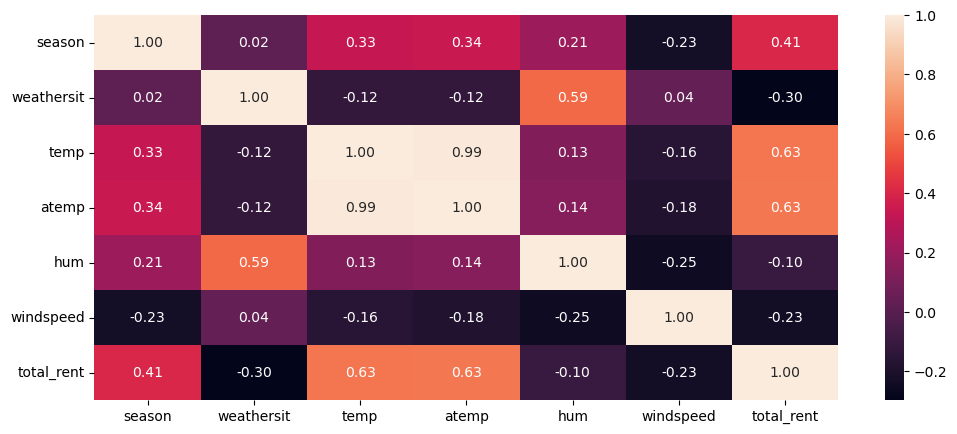

In [40]:
plt.figure(figsize=(12,5))
sns.heatmap(bike_days_corr, annot=True, fmt='.2f')
plt.show()

**Hour Correlation**

In [41]:
bike_hours_corr = bike_hours[['season','weathersit','temp','atemp','hum','windspeed','total_rent']].corr()

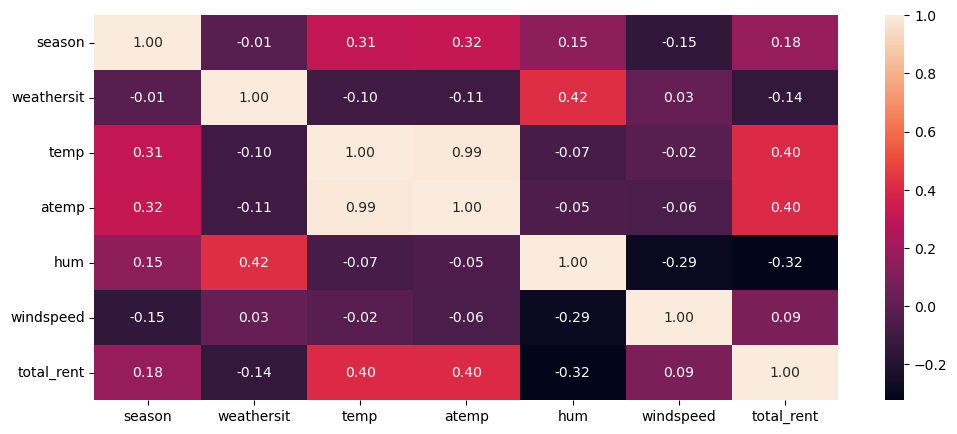

In [42]:
plt.figure(figsize=(12,5))
sns.heatmap(bike_hours_corr, annot=True, fmt='.2f')
plt.show()

**Observation**

- That there is a strong positive correlation between `total_rent` and `temp, atemp` which means that the number of Bike Sharing Rent is highly dependent on the temperature condition.
- Whereas there is a negative correlation in day.csv, which is `total_rent` with `hum, windspeed`

### Bike Rent by Season and temp

In [43]:
bike_season = bike_days[['season', 'temp','total_rent']]
bike_season['season'] = bike_season['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_season['temp'] = bike_season['temp'] * 41
bike_season = bike_season.groupby('season').agg({'temp':'mean',
                                  'total_rent':'sum'}).reset_index()

bike_season

,season,temp,total_rent
0,Fall,28.958682,1061129
1,Spring,12.207650,471348
2,Summer,22.320611,918589
3,Winter,17.339148,841613


**Observation**

That Bike Sharing Rent is highest in the Fall season with an average temperature of 28.95 Celsius and least in the Spring season with a temperature of 12.20 Celsius. This makes sense because spring is a transition from the winter season and usually the temperature in that month is the coldest so it affects Bike Sharing Rent.

### Bike Rent by weather and temp

In [44]:
bike_weather = bike_hours[['weathersit', 'temp','total_rent']]
bike_weather['weathersit'] = bike_weather['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Rainy', 4:'Stormy'})
bike_weather['temp'] = bike_weather['temp'] * 41
bike_weather = bike_weather.groupby('weathersit').agg({'temp':'mean',
                                  'total_rent':'sum'}).reset_index()

bike_weather

,weathersit,temp,total_rent
0,Clear,20.953217,2338173
1,Cloudy,19.452262,795952
2,Rainy,18.724200,158331
3,Stormy,7.653333,223


**Observation**

Bike Sharing Rent is highest when the weather is Clear and the average temperature is 21 Celsius, next is Cloudy with an average temperature of 19.28 Celsius while Bike Sharing Rent is very little when the weather is Rainy. This makes sense because people are unlikely to travel by bike in Stormy or bad weather.

## Visualization & Explanatory Analysis

In [45]:
color = ['#1d3557','#219ebc']

### Question 1: How does Bike Sharing Rent compare between casual and registered types?

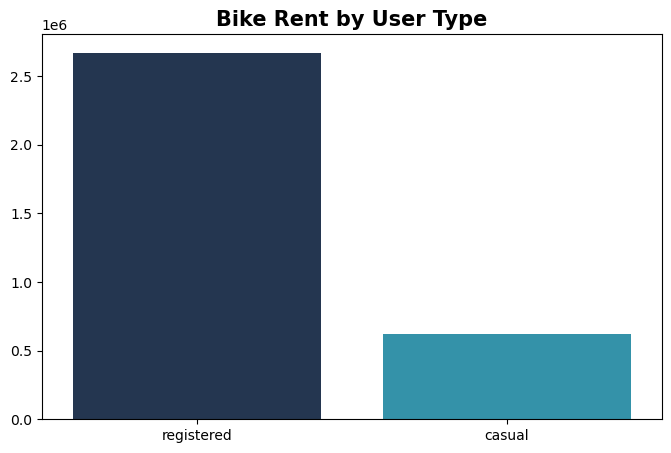

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data= bikeday_usertype.sort_values('count', ascending=False), x='User type', y='count', palette=color)
plt.title('Bike Rent by User Type', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Observation**

There are more registered than casual borrowers.

### Question 2: What is the trend of Bike Sharing Rent per year?

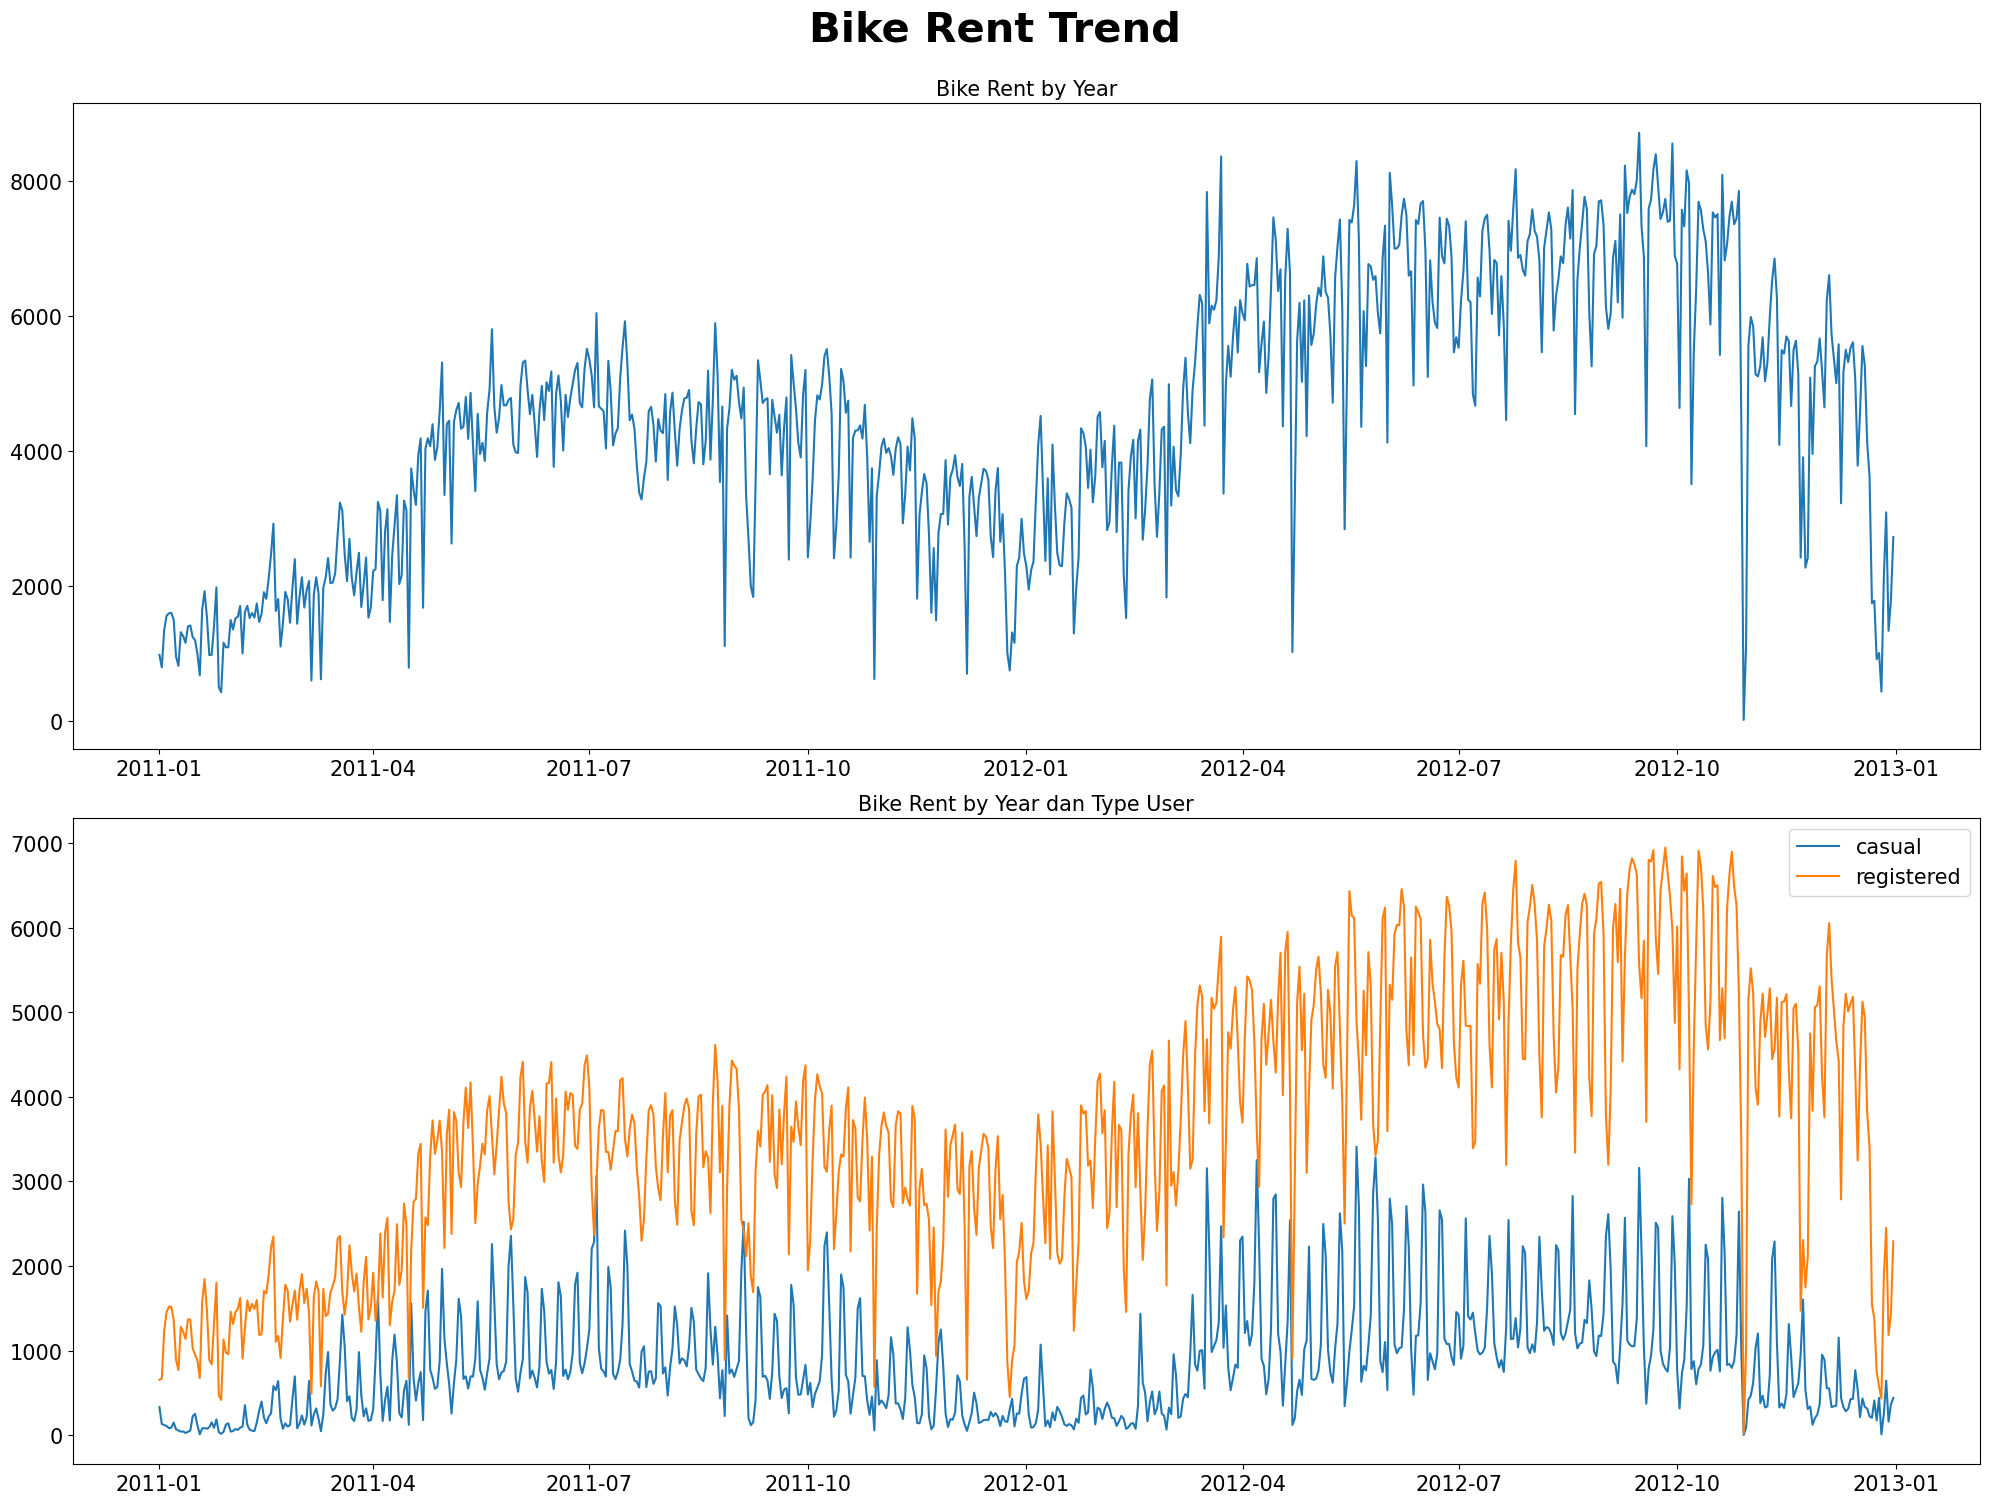

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
sns.lineplot(data = bike_days, x='date_day', y='total_rent', ax=ax[0])
ax[0].set_title('Bike Rent by Year', fontdict={'fontsize':15})
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='both', labelsize=15)


sns.lineplot(data = bike_days, x='date_day', y='casual', ax=ax[1], label = 'casual')
sns.lineplot(data = bike_days, x='date_day', y='registered', ax=ax[1], label = 'registered')
ax[1].set_title('Bike Rent by Year dan Type User', fontdict={'fontsize':15})
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='both', labelsize=15)
ax[1].legend(fontsize=15)

plt.suptitle('Bike Rent Trend', fontsize= 30, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

### Question 3: What are the trends of Bike Sharing Rent by day, month and year?

**Trend by Year**

In [48]:
bike_year_melt = pd.melt(bike_year, id_vars='year', value_vars=['casual','registered'], var_name='type')
bike_year_melt

,year,type,value
0,2011,casual,247252
1,2012,casual,372765
2,2011,registered,995851
3,2012,registered,1676811


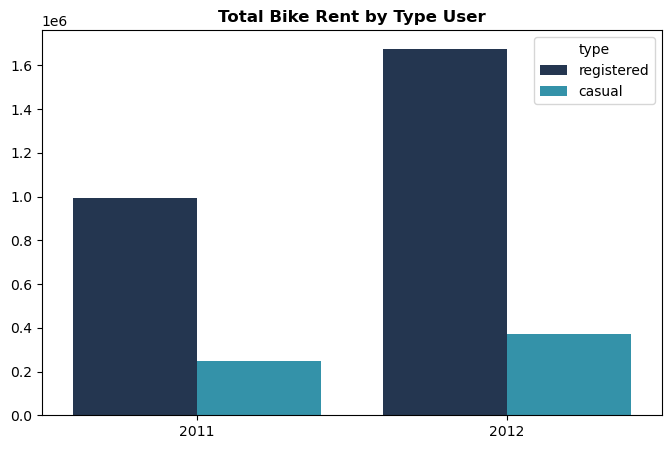

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(data= bike_year_melt.sort_values('value',ascending=False), x='year', y='value', hue='type', palette=color)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Total Bike Rent by Type User', fontweight='bold')
plt.show()

**Observation**

There are more registered borrowers than casual borrowers and the number of Bike Sharing Rent increases every year.

**Trend by Month**

In [50]:
month_trend = bike_days[['date_day','casual','registered','total_rent']]
month_trend = month_trend.resample(rule='M', on='date_day').agg({'casual':'sum', 'registered':'sum','total_rent':'sum'})
month_trend.index = month_trend.index.strftime('%b %Y')
month_trend.reset_index(inplace=True)
month_trend.rename(columns={'date_day':'month_period'}, inplace=True)

month_trend.head()

,month_period,casual,registered,total_rent
0,Jan 2011,3073,35116,38189
1,Feb 2011,6242,41973,48215
2,Mar 2011,12826,51219,64045
3,Apr 2011,22346,72524,94870
4,May 2011,31050,104771,135821


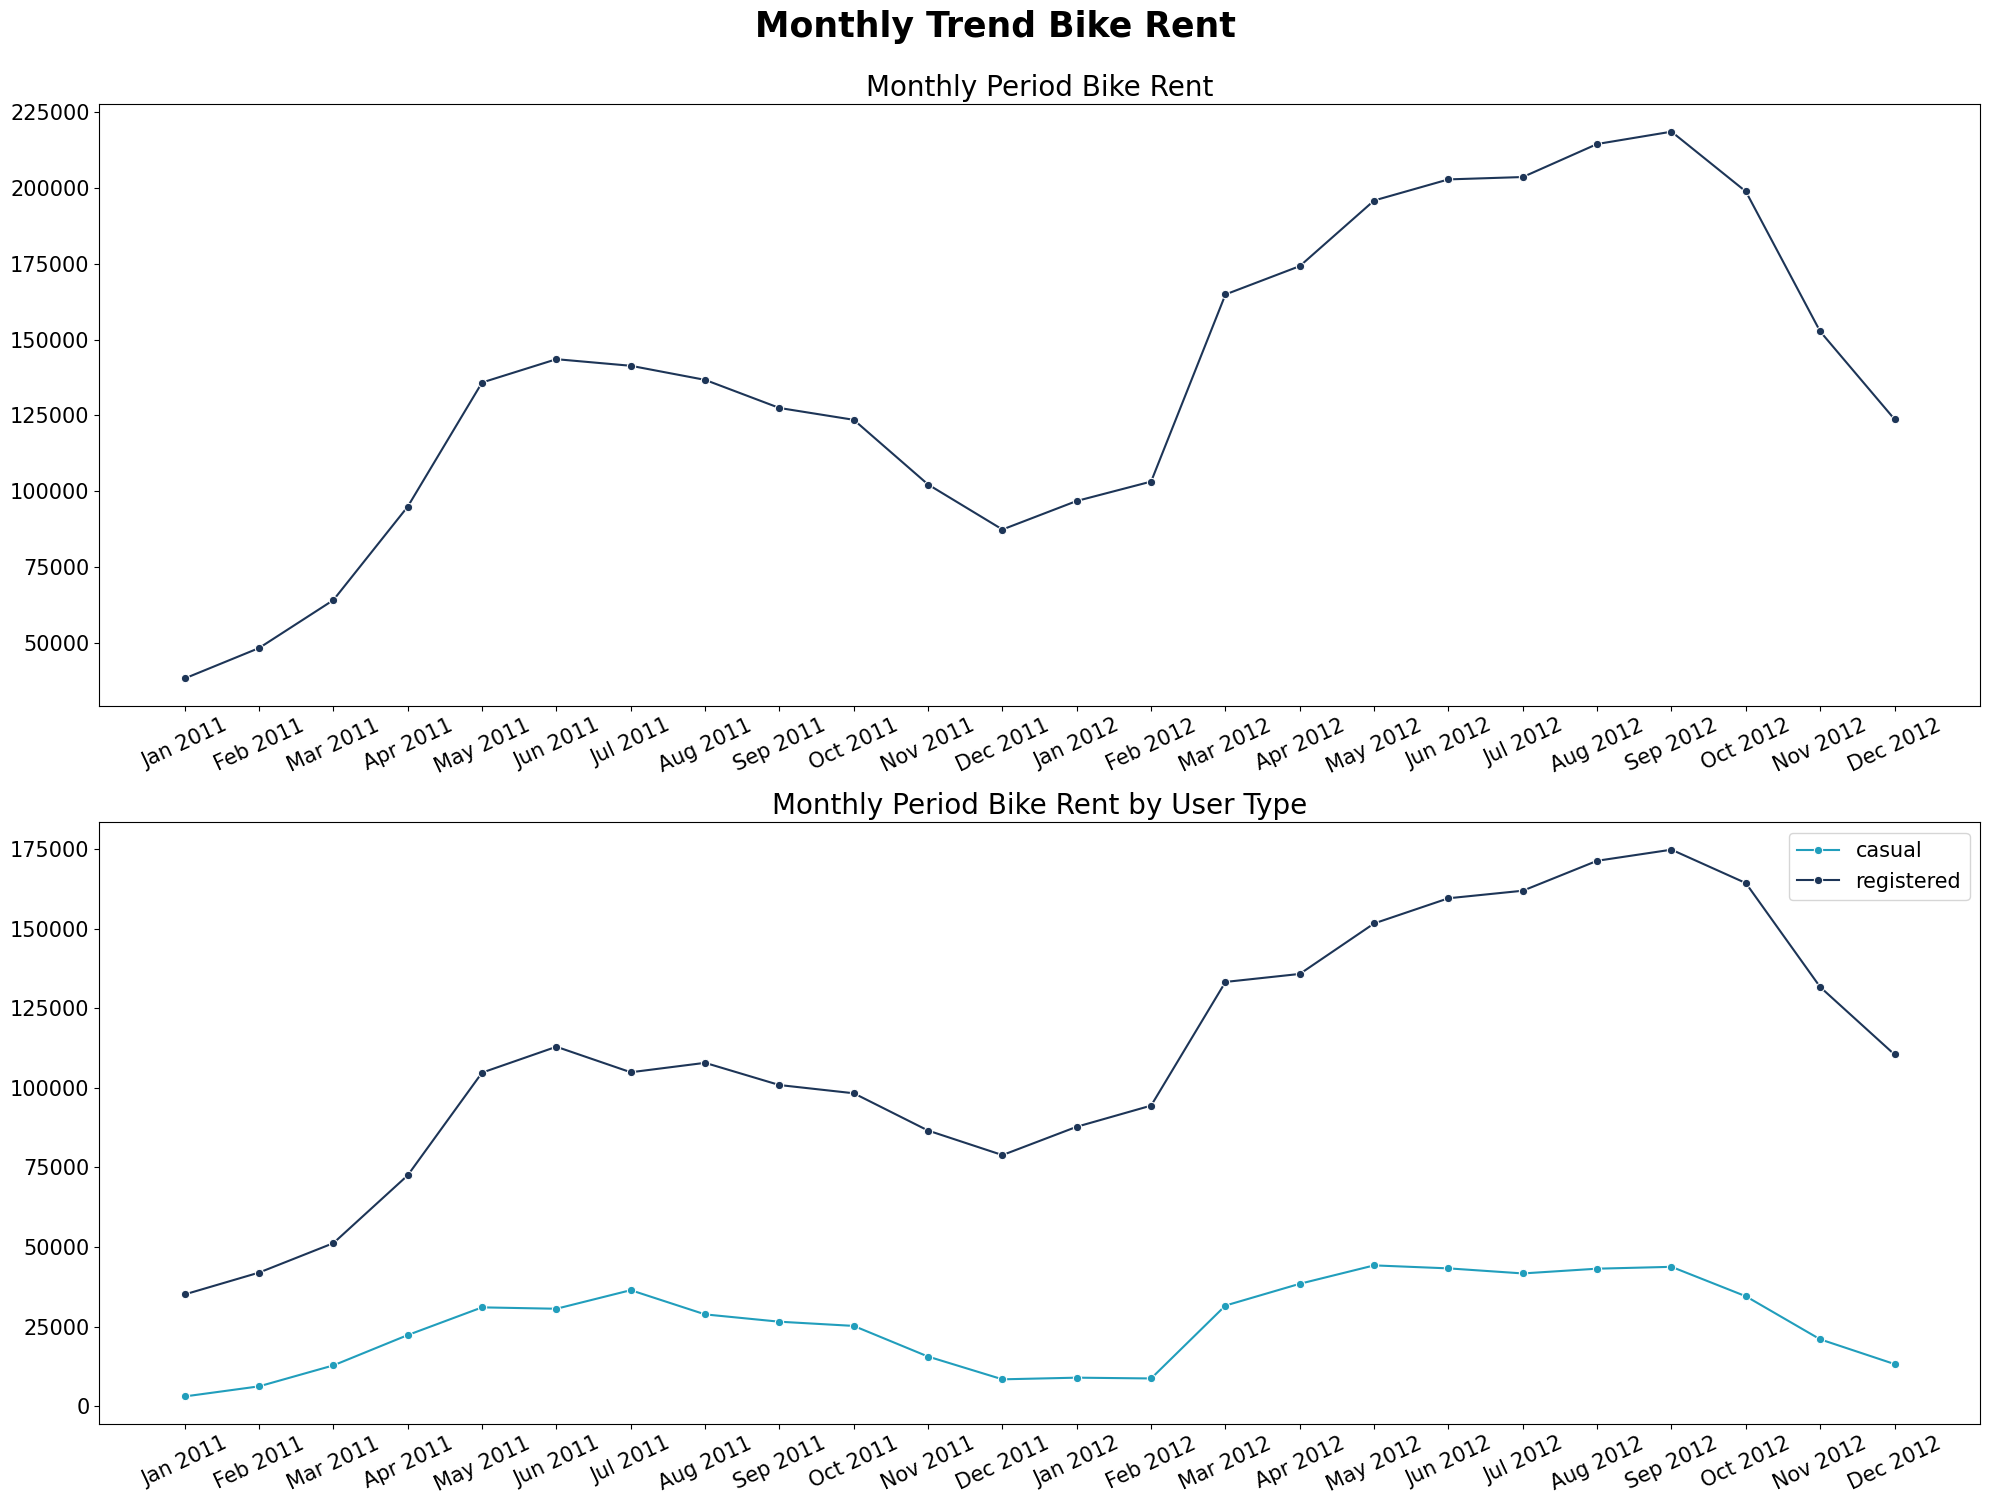

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

sns.lineplot(data = month_trend, x='month_period', y='total_rent', ax=ax[0], marker="o", color="#1d3557")
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', rotation=25, labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_title('Monthly Period Bike Rent', fontsize=20)

sns.lineplot(data = month_trend, x='month_period', y='casual', 
             ax=ax[1], marker="o", color="#219ebc", label='casual')
sns.lineplot(data = month_trend, x='month_period', y='registered', 
             ax=ax[1], marker="o", color="#1d3557", label='registered')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', rotation=25, labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_title('Monthly Period Bike Rent by User Type', fontsize=20)
ax[1].legend(fontsize=15)

plt.suptitle('Monthly Trend Bike Rent', fontsize= 25, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

**Observation**

That the highest peak of Bike Sharing Rent in September 2012 and the lowest bike rentals at the beginning of the year

**Trend by Weekdays**

In [52]:
weekdays_type = pd.melt(bike_dayname, id_vars='days', value_vars=['casual','registered'], var_name='type')
weekdays_type

,days,type,value
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


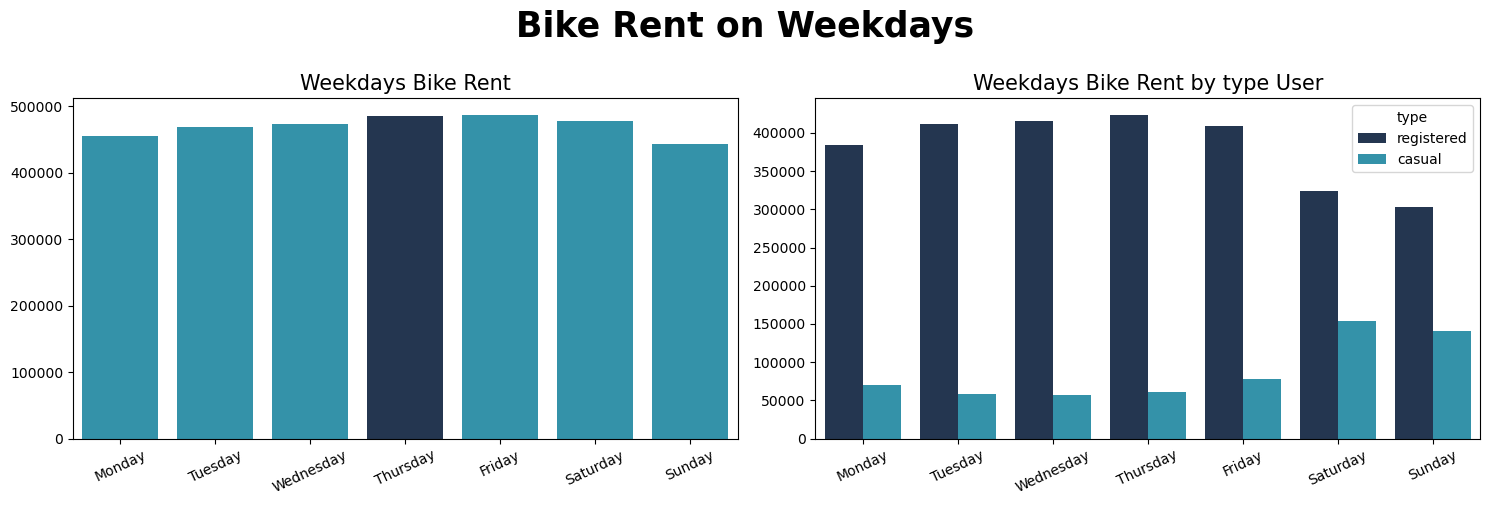

In [53]:
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Find the day with the highest total_rent
max_day = weekdays_type.loc[weekdays_type['value'].idxmax(), 'days']

# Create a palette with different colors for the highest bar
palette = ['#1d3557' if day == max_day else '#219ebc' for day in order_days]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.barplot(data=bike_dayname, x='days', y='total_rent', ax=ax[0],
            palette=palette,
            order=order_days)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', rotation=25, labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].set_title('Weekdays Bike Rent', fontsize=15)

sns.barplot(data=weekdays_type.sort_values('value',ascending=False), x='days', y='value', hue='type',ax=ax[1], order=order_days, 
            palette=color)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', rotation=25, labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].set_title('Weekdays Bike Rent by type User', fontsize=15)
plt.suptitle('Bike Rent on Weekdays', fontsize= 25, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

**Observation**

Bike Sharing Rent is highest on weekdays and peaks on Fridays while when entering the weekend bike rentals decrease except for casual user types which increase on weekends.

**Bike Rent on Holidays**

In [54]:
holidays_rent = pd.melt(bike_holidays, id_vars='holiday', value_vars=['casual','registered'], var_name='type')
holidays_rent

,holiday,type,value
0,0,casual,597658
1,1,casual,22359
2,0,registered,2616586
3,1,registered,56076


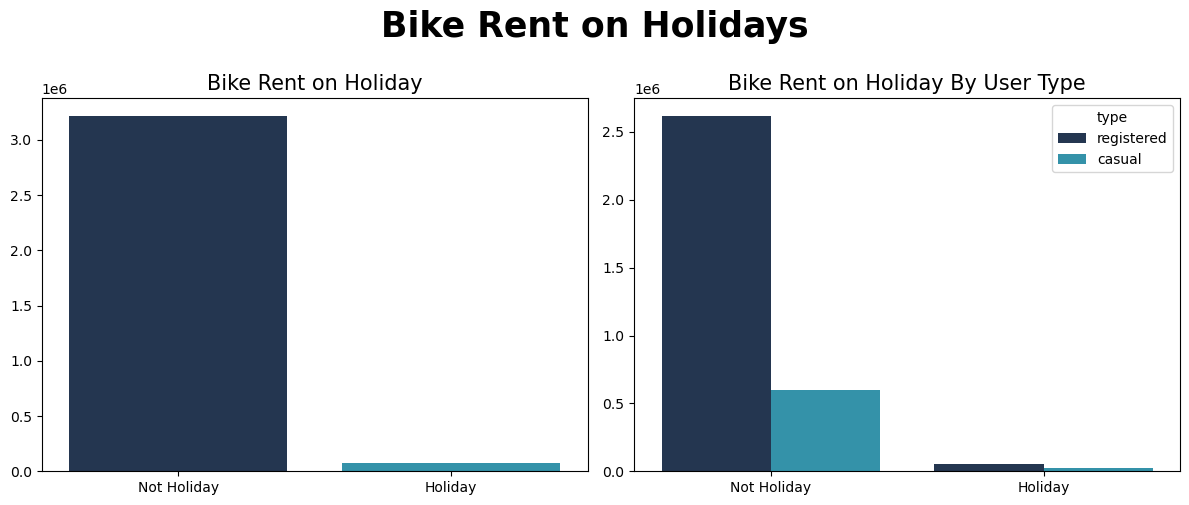

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,5))
sns.barplot(data= bike_holidays.sort_values('total_rent', ascending=False), x= 'holiday', y='total_rent', 
            palette=color, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].set_title('Bike Rent on Holiday', fontsize=15)
ax[0].set_xticklabels(['Not Holiday', 'Holiday'])

sns.barplot(data= holidays_rent.sort_values('value', ascending=False), x= 'holiday', y='value', 
            palette=color, ax=ax[1], hue='type')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].set_title('Bike Rent on Holiday By User Type', fontsize=15)
ax[1].set_xticklabels(['Not Holiday', 'Holiday'])

plt.suptitle('Bike Rent on Holidays', fontsize= 25, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

### Question 4: During what time of day do most Bike Rent events occur?

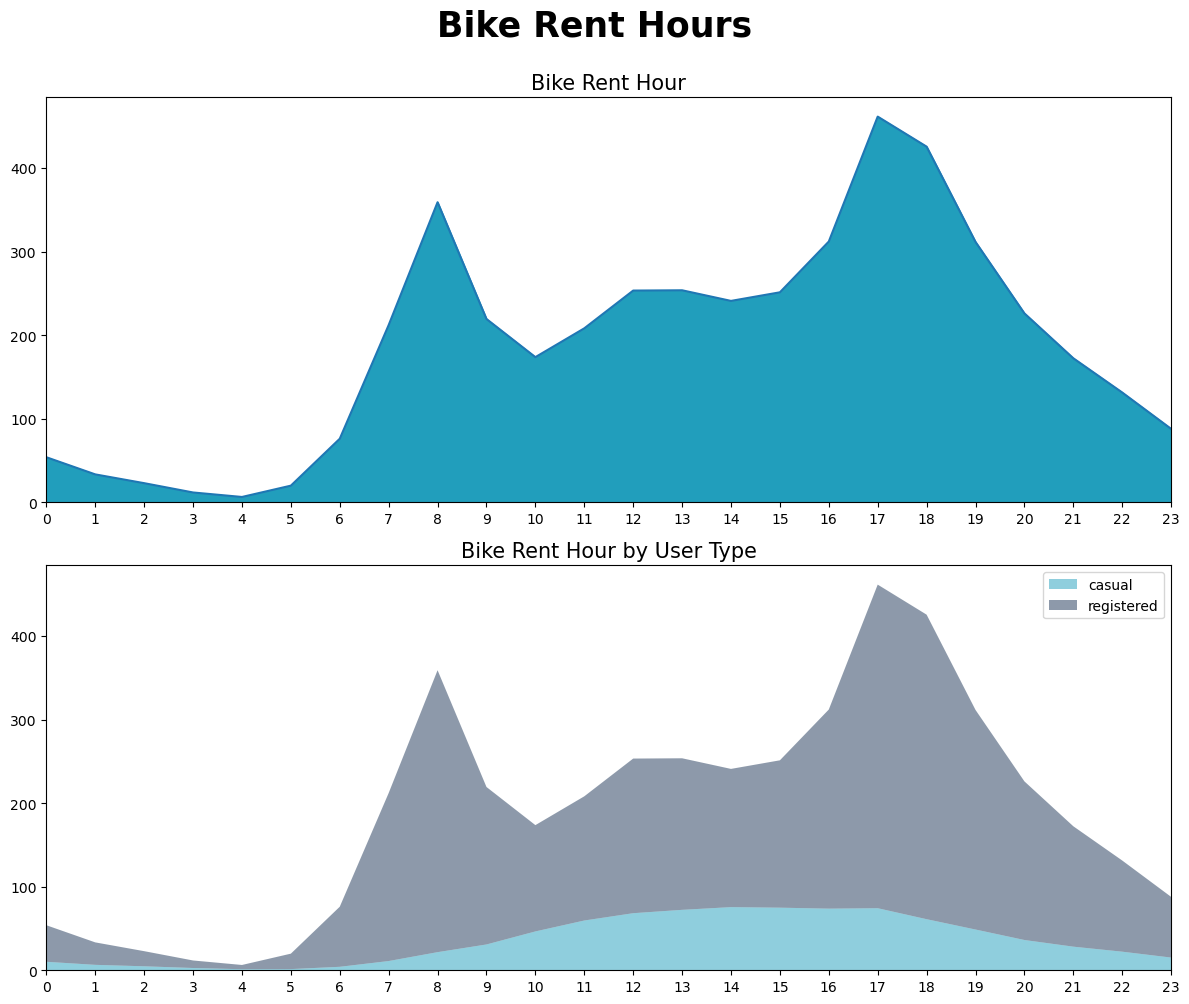

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))

ax[0].plot(bike_hour['hour'],bike_hour['total_rent'])
ax[0].fill_between(bike_hour.hour.values, bike_hour.total_rent.values, color='#219ebc')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_xlim(0,23)
ax[0].set_ylim(ymin= 0)
ax[0].set_xticks(np.arange(24), bike_hour['hour'])
ax[0].set_title('Bike Rent Hour', fontsize=15)

ax[1].stackplot(bike_hour['hour'],bike_hour['casual'], bike_hour['registered'],
                alpha=0.5,
                colors=['#219ebc','#1d3557'],
                labels=['casual', 'registered'])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_xlim(0,23)
ax[1].set_ylim(ymin= 0)
ax[1].set_xticks(np.arange(24), bike_hour['hour'])
ax[1].set_title('Bike Rent Hour by User Type', fontsize=15)
ax[1].legend()
plt.suptitle('Bike Rent Hours', fontsize= 25, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

**Observation**

- The highest average number of Bike Sharing Rents occurred at 5pm and the lowest at 4am.
- The highest peak of bike borrowers occurred at 8am and 5pm. This indicates that bicycles are borrowed for commuting to work and back home.

### Question 5: How is Bike Sharing Rent seasonally, what are the highest and lowest seasons for bike rentals?

In [57]:
bike_season

,season,temp,total_rent
0,Fall,28.958682,1061129
1,Spring,12.207650,471348
2,Summer,22.320611,918589
3,Winter,17.339148,841613


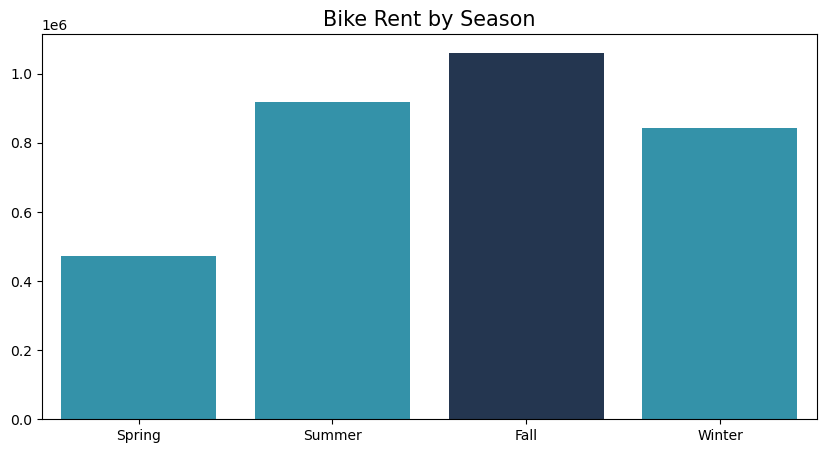

In [58]:
season_order = ['Spring','Summer','Fall','Winter']
plt.figure(figsize=(10,5))
max_season = bike_season.loc[bike_season['total_rent'].idxmax(), 'season']

# Create a palette with different colors for the highest bar
palette = ['#1d3557' if season == max_season else '#219ebc' for season in season_order]

sns.barplot(data=bike_season, x='season', y='total_rent', order=season_order, palette=palette)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Bike Rent by Season', fontsize=15)
plt.show()

### Question 6: What are the factors that influence the number of Bike Sharing Rent?

In [59]:
weather_season = bike_hours[['weathersit','season','total_rent']]
weather_season['weathersit'] = weather_season['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Rainy', 4:'Stormy'})
weather_season['season'] = weather_season['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
weather_season = weather_season.groupby(['weathersit','season']).agg({'total_rent':'sum'}).reset_index()
weather_season.head(3)

,weathersit,season,total_rent
0,Clear,Fall,801941
1,Clear,Spring,325278
2,Clear,Summer,664463


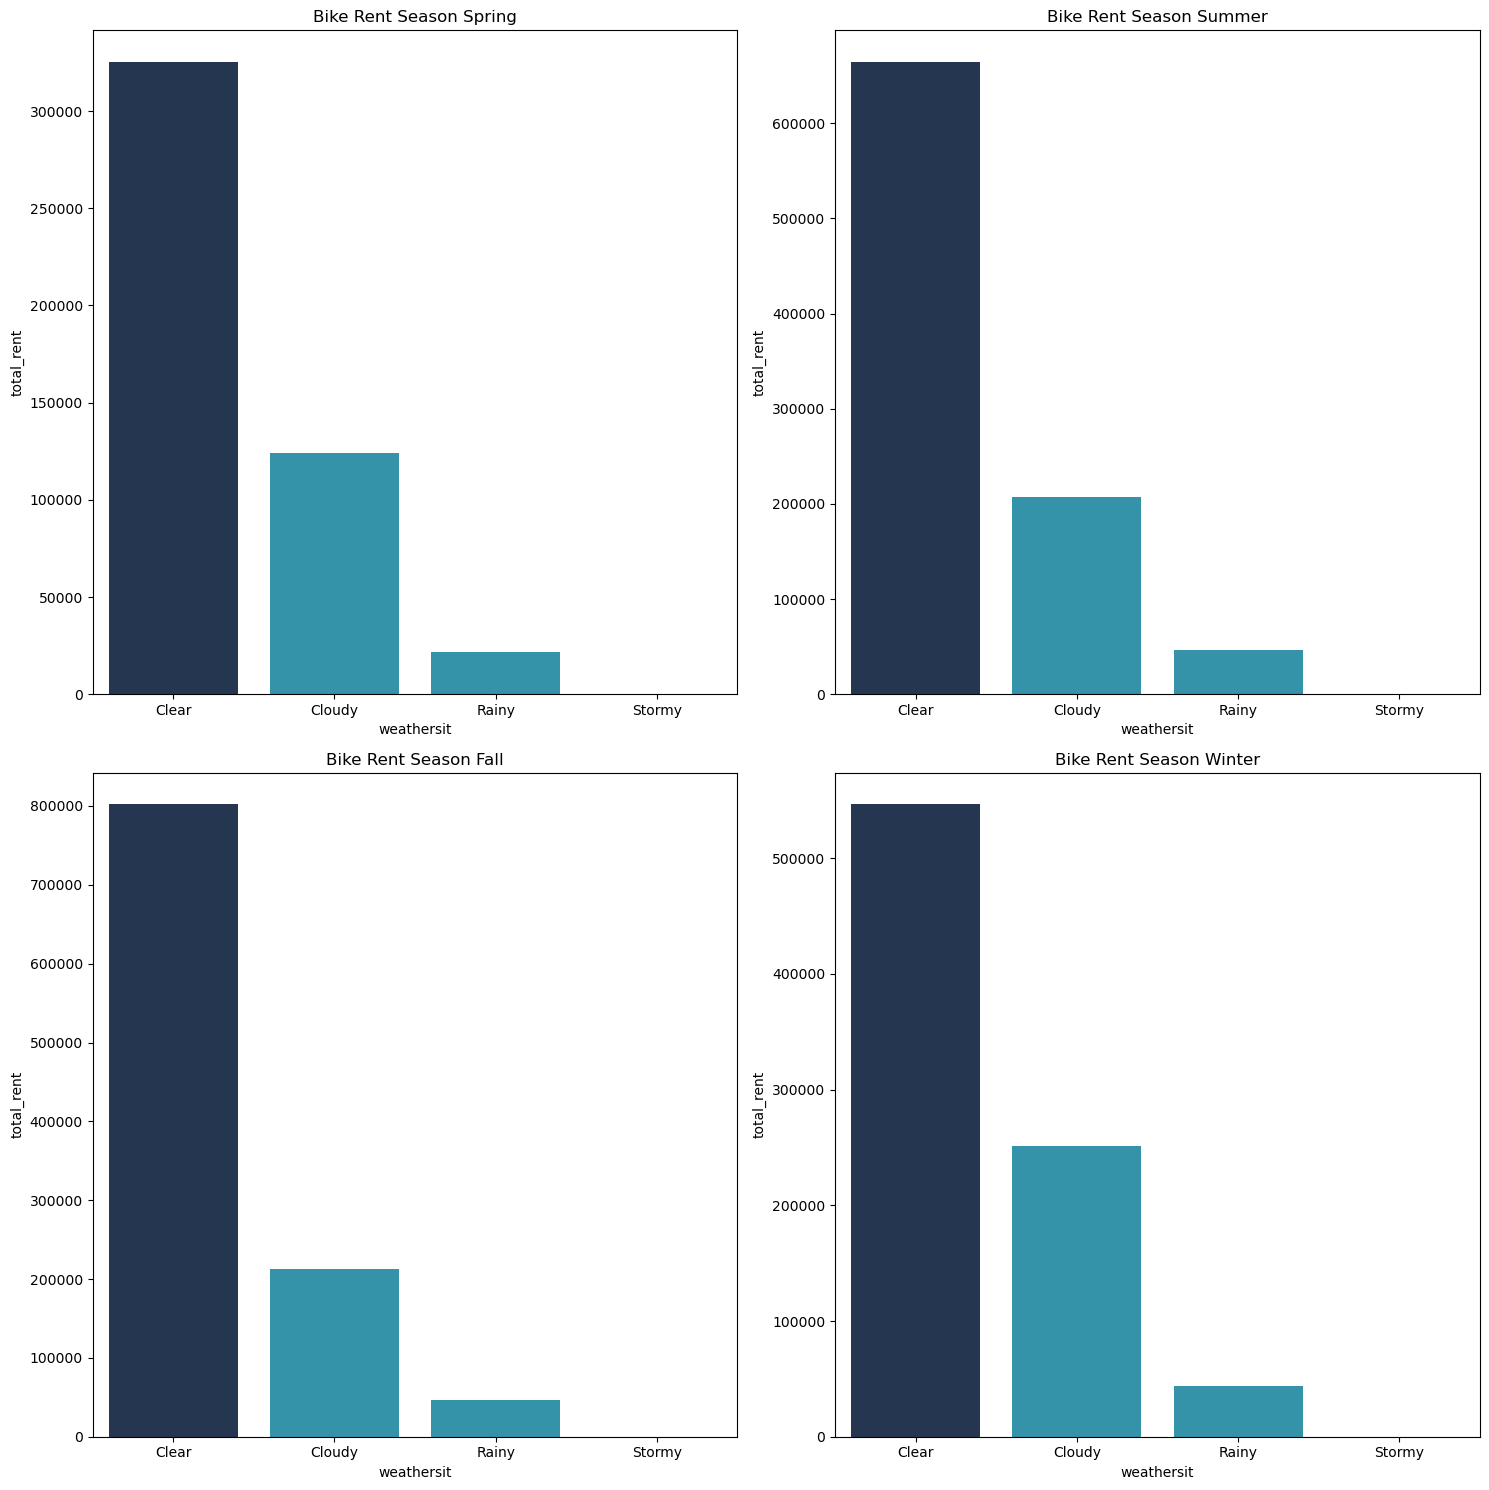

In [60]:
list_season = ['Spring','Summer','Fall','Winter']
weather_order = ['Clear','Cloudy','Rainy','Stormy']
plt.figure(figsize=(15,15))

max_weather = weather_season.loc[weather_season['total_rent'].idxmax(), 'weathersit']

# Create a palette with different colors for the highest bar
palette = ['#1d3557' if weather == max_weather else '#219ebc' for weather in weather_order]
for i in range(0,len(list_season)):
    plt.subplot(2, 2, i+1)
    sns.barplot(data= weather_season[weather_season['season']==list_season[i]], x='weathersit', y='total_rent', order=weather_order,
                palette=palette)
    plt.title(f'Bike Rent Season {list_season[i]}')
    plt.tight_layout()
plt.show()

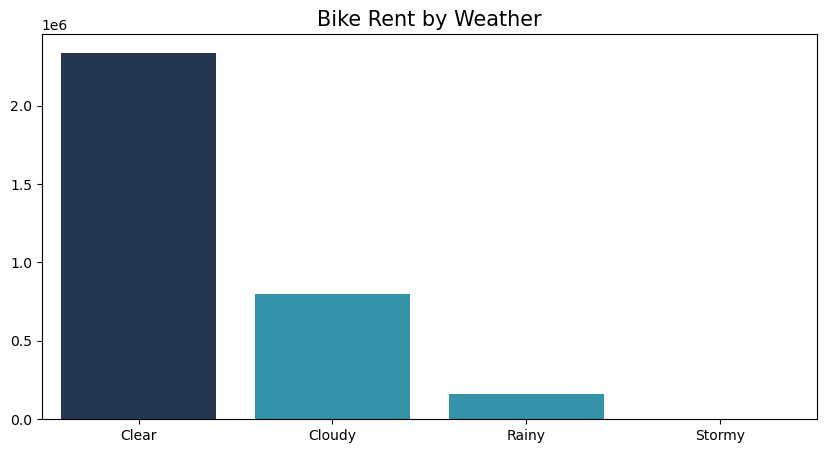

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(data=bike_weather.sort_values('total_rent',ascending=False), x='weathersit', y='total_rent', 
            palette=['#1d3557','#219ebc','#219ebc'])
plt.xlabel(None)
plt.ylabel(None)
plt.title('Bike Rent by Weather', fontsize=15)
plt.show()

**Observation**

he number of bike renters increases during Clear weather and decreases during Rainy weather while Stormy weather has very few bike renters

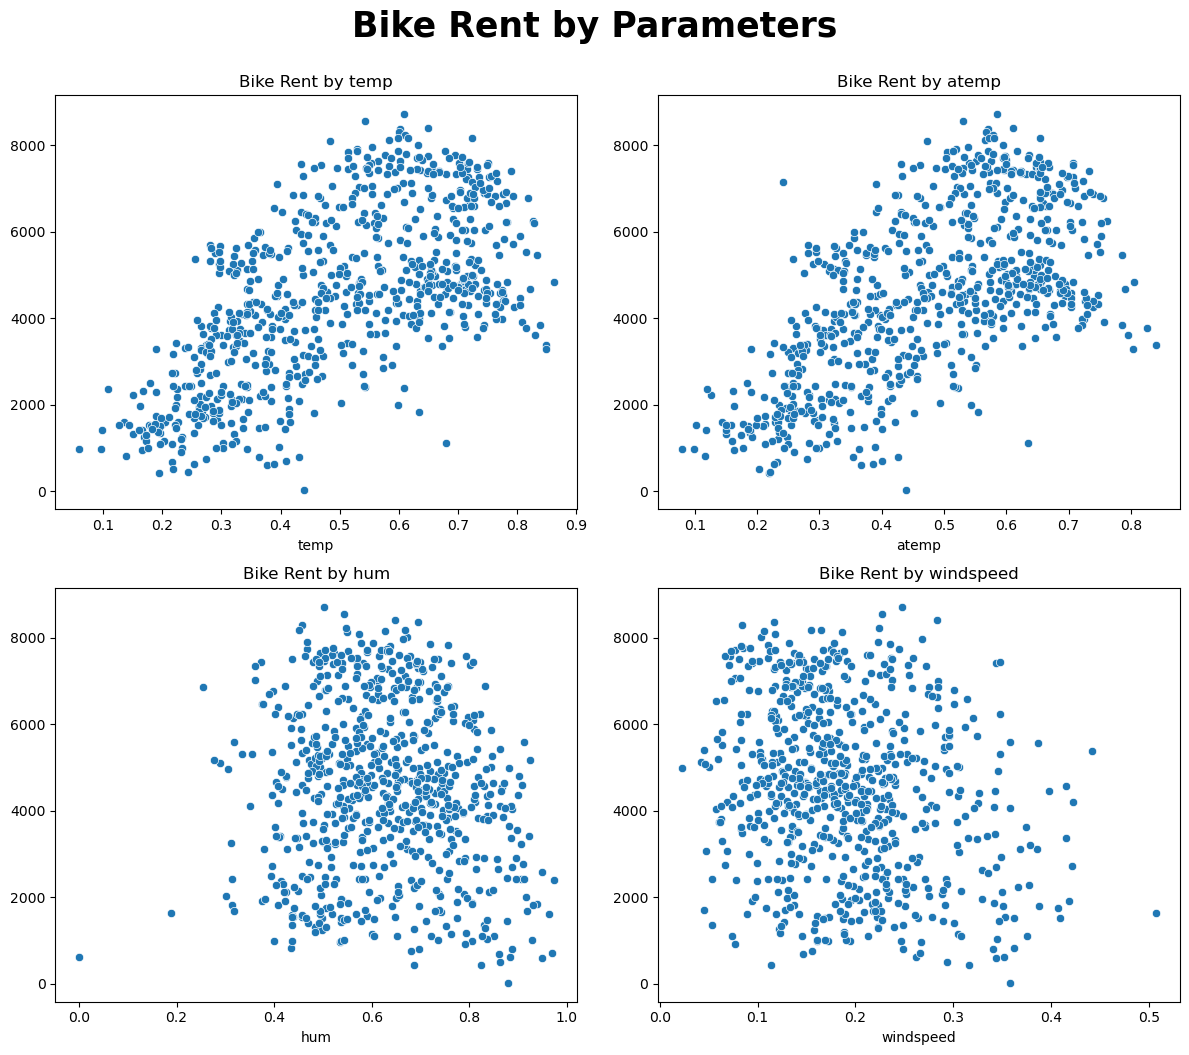

In [62]:
rent_param = bike_days[['total_rent', 'temp', 'atemp', 'hum','windspeed']]
column = rent_param.columns.tolist()[1:]
plt.figure(figsize=(12,10))

for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x= rent_param[column[i]], y = rent_param['total_rent'])
    plt.tight_layout()
    plt.ylabel(None)
    plt.title(f'Bike Rent by {column[i]}')
plt.suptitle('Bike Rent by Parameters', fontsize= 25, fontweight='bold', y=1.05)
plt.show()

**Observation**

- It appears that the number of bike-renters has a positive correlation with temperature and atemp. This implies that the number of bike-sharing users increases as the temperature increases.
- Meanwhile, there is a slight negative correlation between hum and windspeed vs. number of renters.

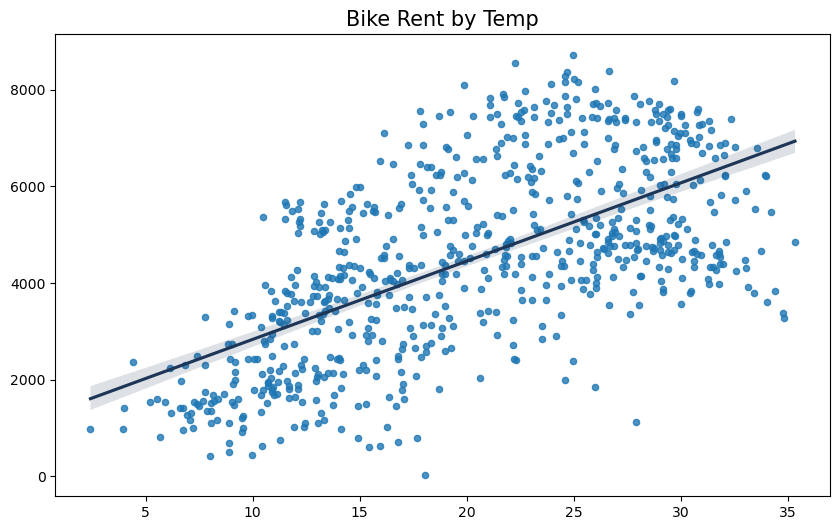

In [63]:
temp_rent = bike_days[['temp','casual','registered','total_rent']]
temp_rent['temp'] = temp_rent['temp'] * 41
plt.figure(figsize=(10,6))
sns.regplot(data=temp_rent, x='temp', y='total_rent', scatter_kws={'s': 20}, line_kws={'color': '#1d3557'})
plt.title('Bike Rent by Temp', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

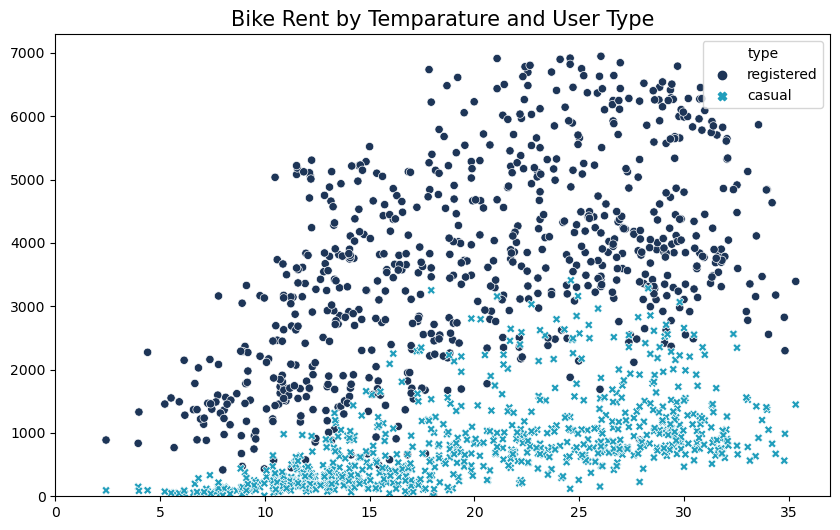

In [64]:
temp_bytype = pd.melt(temp_rent, id_vars='temp', value_vars=['casual','registered'], var_name='type')
plt.figure(figsize=(10,6))
sns.scatterplot(data=temp_bytype.sort_values('type', ascending=False), x='temp', y='value', hue='type', style='type', palette=color)
plt.title('Bike Rent by Temparature and User Type', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.show()

**Observation**

Bike Sharing Rent is influenced by temperature, the number of renters increases as the temperature increases while the number of bike renters decreases when the temperature is very low.

## Conclusion

### How does Bike Sharing Rent compare between casual and registered types?


The number of users with registered type is 2.6 million while casual users are only 600000 which means that registered users are more. this shows a substantial difference, with registered users about 4x more than casual users.

### What is the trend of Bike Sharing Rent per year?

The number of Bike Sharing Rent fluctuates but the number of bike rentals increased in 2012 which was dominated by registered bike users.

### What are the trends of Bike Sharing Rent by day, month and year?

The number of Bike Sharing Rent increased in 2012 and peaked in September, for bicycle use is dominated on weekdays (Monday - Friday) and peaks on Fridays, this is also seen where on holidays the number of bicycle renters decreases but there is an interesting thing that casual type bicycle renters increase on weekends.

### During what time of day do most Bike Rent events occur?

The highest average number of bicycle rentals in the morning and afternoon can be seen in the graph of bicycle rentals based on peak hours at 8am and 5pm. This indicates that bicycles are rented when going to work and returning from work.

### How is Bike Sharing Rent seasonally, what are the highest and lowest seasons for bike rentals?

Bike Sharing Rent is highest in the Fall season, which is probably the best weather for traveling by bicycle, and lowest in the Spring season, where the temperature is quite cold due to the transition from the Winter season.

### What are the factors that influence the number of Bike Sharing Rent?

- Bike Sharing Rent is influenced by the weather, bike renters increase when the weather is good and decrease when the weather is unfavorable, especially during rainy and bad weather.
- The number of bicycle rentals is strongly influenced by temperature, there is a strong positive relationship between temp and atemp on the number of bicycle rentals. This indicates that the number of renters increases as the temperature increases and decreases when the temperature is low while bicycle rentals have a slight negative relationship with hum and windspeed showing that as humidity and windspeed increase, there is a slight decrease in the number of bicycle rentals.